In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()


2018-03-21 12:07:06,180 root         INFO     Load data from SQL.


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
count,2.150600e+04,21506.000000,21506.000000,21506.000000,21506.000000,21506.000000,21506.000000,2.150600e+04,21506.000000,21506.000000,21506.000000
mean,1.520938e+09,7356.685537,7362.888579,7360.009057,7359.893181,1.773936,0.058105,5.071774e+05,0.058290,0.023775,1943.376839
std,3.950608e+05,766.980412,766.515732,766.701880,766.695672,3.787566,0.074716,3.347387e+05,0.034726,0.064792,3073.943970
min,1.520272e+09,5930.000000,5970.960000,5955.390000,5955.390000,0.000673,-0.084993,2.193000e+04,-0.028105,-0.108224,0.000000
25%,1.520596e+09,6750.010000,6758.610000,6754.107500,6754.645000,0.147624,0.015545,2.413892e+05,0.031726,-0.024472,0.000000
50%,1.520929e+09,7318.500000,7324.930000,7320.935000,7321.600000,0.551890,0.044462,4.123950e+05,0.057937,0.021777,0.000000
75%,1.521300e+09,7734.890000,7742.020000,7739.015000,7739.070000,1.769991,0.077895,7.299720e+05,0.081718,0.061250,6327.382500
max,1.521626e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.987974e+06,0.173389,0.211511,9689.110000


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
time,1.000000,-0.787967,-0.789250,-0.788710,-0.788630,-0.027035,-0.085668,0.127350,-0.232726,-0.458527,0.807038
low,-0.787967,1.000000,0.999891,0.999933,0.999949,-0.031002,0.059353,0.111266,0.172285,0.607513,-0.499711
high,-0.789250,0.999891,1.000000,0.999950,0.999949,-0.020773,0.060373,0.110119,0.172621,0.607593,-0.500958
open,-0.788710,0.999933,0.999950,1.000000,0.999907,-0.024908,0.059915,0.110583,0.172346,0.607643,-0.500438
close,-0.788630,0.999949,0.999949,0.999907,1.000000,-0.025881,0.059801,0.110763,0.172535,0.607498,-0.500324
volume,-0.027035,-0.031002,-0.020773,-0.024908,-0.025881,1.000000,0.053648,-0.059406,-0.015258,-0.009569,-0.019533
tw_sentiment,-0.085668,0.059353,0.060373,0.059915,0.059801,0.053648,1.000000,-0.158404,-0.091068,-0.066901,-0.153714
tw_followers,0.127350,0.111266,0.110119,0.110583,0.110763,-0.059406,-0.158404,1.000000,-0.143940,0.262341,0.297524
reddit_sentiment,-0.232726,0.172285,0.172621,0.172346,0.172535,-0.015258,-0.091068,-0.143940,1.000000,-0.114178,-0.341234
google_sentiment,-0.458527,0.607513,0.607593,0.607643,0.607498,-0.009569,-0.066901,0.262341,-0.114178,1.000000,-0.262570


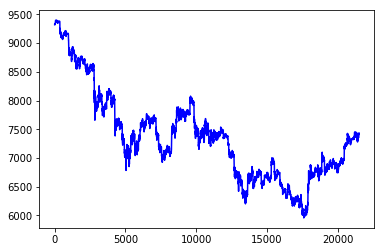

In [5]:
plt.plot(df['close'], 'b')

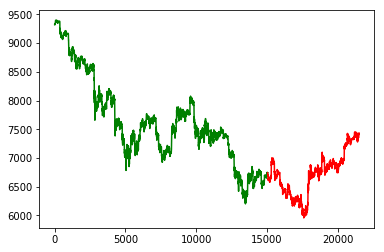

In [6]:
max = df['close'].count()
limit = int(0.3 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a08bd30>,
      dtype=object)

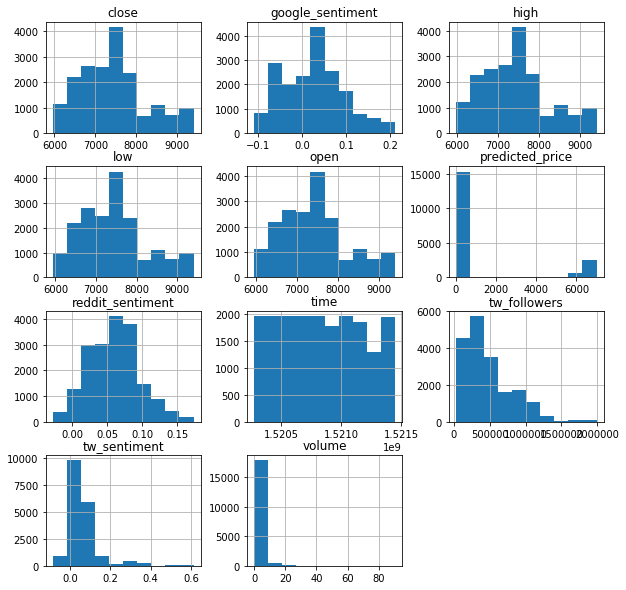

In [7]:
df.hist(figsize=(10,10))

In [7]:
from bitcoin.core import Core
core = Core()
history = core.train()

2018-03-21 12:07:34,930 root         INFO     ENV => test
2018-03-21 12:07:34,931 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-03-21 12:07:36,634 root         INFO     Load data from SQL.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/100
15054/15054 [==============================] - 2s 100us/step - loss: 42.3654 - mean_squared_error: 0.0213 - mean_absolute_error: 0.1201 - val_loss: 40.4872 - val_mean_squared_error: 0.0299 - val_mean_absolute_error: 0.1405
Epoch 31/100
15054/15054 [==============================] - 1s 99us/step - loss: 40.4644 - mean_squared_error: 0.0222 - mean_absolute_error: 0.1177 - val_loss: 38.6646 - val_mean_squared_error: 0.0361 - val_mean_absolute_error: 0.1587
Epoch 32/100
15054/15054 [==============================] - 2s 100us/step - loss: 38.6303 - mean_squared_error: 0.0253 - mean_absolute_error: 0.1243 - val_loss: 36.9151 - val_mean_squared_error: 0.0403 - val_mean_absolute_error: 0.1672
Epoch 33/100
15054/15054 [==============================] - 1s 98us/step - loss: 36.8747 - mean_squared_error: 0.0259 - mean_absolute_error: 0.1269 - val_loss: 35.2135 - val_mean_squared_error: 0.0370 - val_mean_absolute_error: 0.1600
Epoch 34/100
15054/15054 [==============================] 

Epoch 65/100
15054/15054 [==============================] - 2s 116us/step - loss: 6.7717 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0288 - val_loss: 6.3842 - val_mean_squared_error: 3.7371e-04 - val_mean_absolute_error: 0.0156
Epoch 66/100
15054/15054 [==============================] - 2s 134us/step - loss: 6.3969 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 6.0371 - val_mean_squared_error: 6.9378e-04 - val_mean_absolute_error: 0.0226
Epoch 67/100
15054/15054 [==============================] - 2s 108us/step - loss: 6.0434 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0288 - val_loss: 5.7007 - val_mean_squared_error: 8.8653e-04 - val_mean_absolute_error: 0.0259
Epoch 68/100
15054/15054 [==============================] - 2s 108us/step - loss: 5.7046 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0298 - val_loss: 5.3821 - val_mean_squared_error: 7.7380e-04 - val_mean_absolute_error: 0.0236
Epoch 69/100
15054/15054 [======================

Epoch 100/100
15054/15054 [==============================] - 1s 99us/step - loss: 1.1680 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0249 - val_loss: 1.1083 - val_mean_squared_error: 1.0694e-04 - val_mean_absolute_error: 0.0073


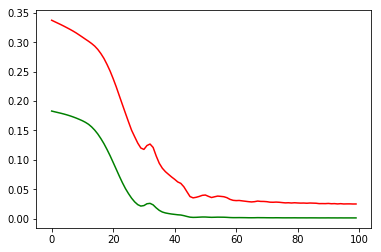

In [8]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [10]:
core.train_anomaly()

2018-03-19 10:09:49,360 root         INFO     Train Anomaly Model
2018-03-19 10:09:49,362 root         INFO     Load data from SQL.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   47.7s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:  1.1min finished


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [11]:
core.test_order_percent()

2018-03-19 10:10:57,041 root         INFO     Load data from SQL.
2018-03-19 10:11:19,765 root         INFO     Error Order percentage: 17.41%
2018-03-19 10:11:19,767 root         INFO     TEST From 2018-03-14 22:45:00 to 2018-03-19 09:07:00
2018-03-19 10:11:19,768 root         INFO     Number of api calls: 0.32 / min
2018-03-19 10:11:19,769 root         INFO     Number of anomalies: 633
2018-03-19 10:11:19,770 root         INFO     With prediction 1710.10 euros => 71.01% => 23.67% / day
2018-03-19 10:11:19,771 root         INFO     Without prediction 1036.79 euros => 3.68% => 1.23% / day
